In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


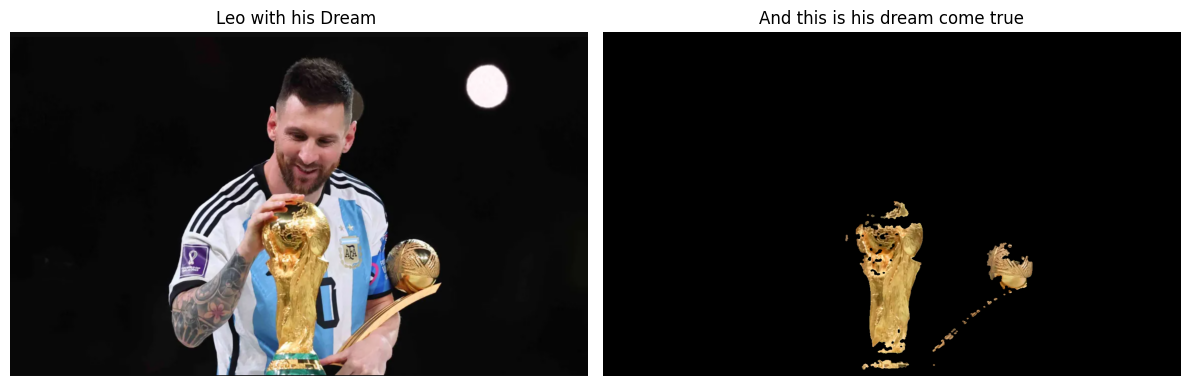

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/content/drive/MyDrive/messi-1.png')

# Convert BGR (OpenCV's default color format) to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Visualize the original image in RGB color space
plt.figure(figsize=(12, 6))

# Main Image
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Leo with his Dream ')
plt.axis('off')

# Convert the image to HSV color space
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define lower and upper HSV values for yellow
lower_yellow = np.array([15, 100, 100])
upper_yellow = np.array([45, 255, 255])

# Create a mask to segment the specified color
mask = cv2.inRange(image_hsv, lower_yellow, upper_yellow)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

segmented_image = cv2.bitwise_and(image_rgb, image_rgb, mask=mask)

plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title('And this is his dream come true')
plt.axis('off')

plt.tight_layout()
plt.show()